In [ ]:
import os

import numpy
from PIL import Image

from taiwan_license_plate_recognition.PostProcess import filter_license_number

In [2]:
%load_ext dotenv
%dotenv
%matplotlib inline

In [3]:
project_root: str = os.environ.get("PROJECT_ROOT", "")
test_image_path: str = f"{project_root}/datasets/ocr/009-DKW.jpg"

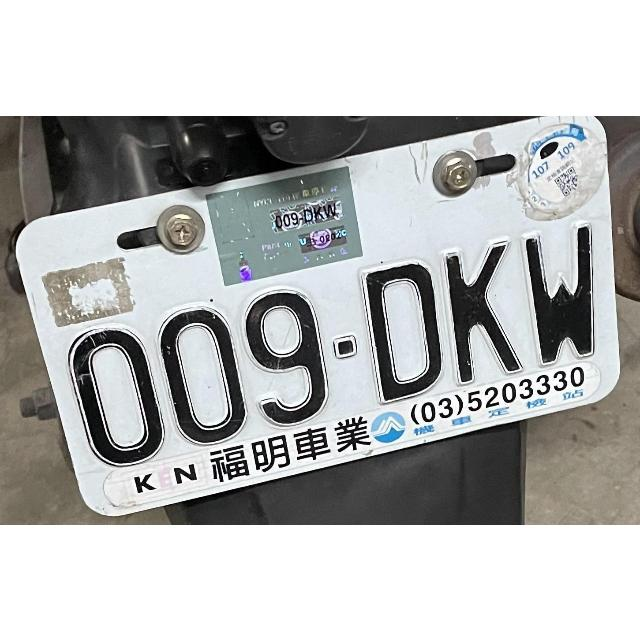

In [4]:
image = Image.open(test_image_path)
image

In [5]:
image.size

(640, 640)

# EasyOCR

In [6]:
import easyocr

In [7]:
reader = easyocr.Reader(["en"], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


## Use PIL format

In [8]:
result: str = reader.readtext(image)
result

[([[264.31671842700024, 210.65835921350012],
   [342.55890094924973, 192.43410538926508],
   [348.68328157299976, 218.34164078649988],
   [270.44109905075027, 236.56589461073492]],
  '{009- DKW',
  0.1268107166465081),
 ([[50.46143933451375, 307.3997422697357],
   [606.5849014644032, 199.22240123760315],
   [627.5385606654862, 372.6002577302643],
   [71.41509853559683, 480.77759876239685]],
  '009 DKH',
  0.3853359774710735),
 ([[399.4392624013421, 398.9271148816105],
   [588.6841594995293, 357.442126840199],
   [595.560737598658, 393.0728851183895],
   [406.3158405004707, 434.557873159801]],
  '(03)5203330',
  0.8995355542669081),
 ([[122.67179882264863, 460.0076982339729],
   [373.5099445181991, 404.62502391456934],
   [381.3282011773514, 454.9923017660271],
   [130.49005548180088, 509.37497608543066]],
  'K n mB8Ee',
  0.09003425441110398)]

## Use picture directly

In [9]:
result = reader.readtext(test_image_path)
result

[([[263.7701175612585, 207.99310580513264],
   [345.6759102508024, 194.64371672219605],
   [349.2298824387415, 221.00689419486736],
   [267.3240897491976, 234.35628327780395]],
  '2009,DKw',
  0.21948471477309262),
 ([[50.70639852770453, 307.3072760248022],
   [607.6082980888943, 200.26700240240194],
   [627.2936014722954, 373.6927239751978],
   [71.39170191110561, 480.73299759759806]],
  '009 DKH',
  0.6724463136927299),
 ([[399.4392624013421, 398.9271148816105],
   [588.6841594995293, 357.442126840199],
   [595.560737598658, 393.0728851183895],
   [406.3158405004707, 434.557873159801]],
  '(03)5203330',
  0.921535755246428),
 ([[122.51257083768542, 459.1175991727596],
   [373.5099445181991, 404.62502391456934],
   [381.4874291623146, 454.8824008272404],
   [130.49005548180088, 509.37497608543066]],
  'K N m88EE',
  0.07771136797176213)]

# PaddleOCR

In [10]:
from paddleocr import PaddleOCR

In [11]:
reader = PaddleOCR(
	lang="en",
	device="cpu",
	use_angle_cls=True,
	total_process_num=8,
	use_mp=True,
	max_text_length=8,
	use_space_char=False,
	binarize=True,
)

[2024/12/08 15:17:04] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/hermeschen/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/hermeschen/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max

In [12]:
result = reader.ocr(numpy.asarray(image, dtype=numpy.uint8))
result

[2024/12/08 15:17:04] ppocr DEBUG: dt_boxes num : 8, elapsed : 0.050137996673583984
[2024/12/08 15:17:04] ppocr DEBUG: cls num  : 8, elapsed : 0.016036033630371094
[2024/12/08 15:17:04] ppocr DEBUG: rec_res num  : 8, elapsed : 0.10015654563903809


[[[[[268.0, 211.0], [341.0, 196.0], [345.0, 218.0], [272.0, 233.0]],
   ('009-DKW', 0.8511984944343567)],
  [[[294.0, 232.0], [347.0, 224.0], [350.0, 244.0], [297.0, 252.0]],
   ('UFORONO', 0.6180065870285034)],
  [[[57.0, 329.0], [582.0, 213.0], [613.0, 354.0], [88.0, 470.0]],
   ('009-DKW', 0.9200801253318787)],
  [[[366.0, 414.0], [582.0, 360.0], [589.0, 387.0], [373.0, 441.0]],
   ('035203330', 0.9961410164833069)],
  [[[125.0, 468.0], [368.0, 415.0], [375.0, 446.0], [132.0, 499.0]],
   ('KN', 0.9463577270507812)]]]

In [13]:
[(result[0][i][1][0]) for i in range(len(result[0]))]

['009-DKW', 'UFORONO', '009-DKW', '035203330', 'KN']

In [14]:
filter_license_number([(result[0][i][1][0]) for i in range(len(result[0]))])

'009DKW'

# Tesseract

In [15]:
import pytesseract

In [16]:
tesseract_config: str = "--psm 6 --oem 1"

In [17]:
result = pytesseract.image_to_string(image, lang="eng", config=tesseract_config)
result

': a\nOS st i\n\nCC a Tit\nom (C\\ 4 | K i\n\n\\ o i |\n\\ J el | 4 Uy * 330\nWI Se C=\n\n«Nn ane ,\n'

# TrOCR

In [18]:
from optimum.intel import OVModelForVision2Seq
from transformers import TrOCRProcessor

In [19]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed", clean_up_tokenization_spaces=True)



--------------------------------------
C++ Traceback (most recent call last):
--------------------------------------
No stack trace in paddle, may be caused by external reasons.

----------------------
Error Message Summary:
----------------------
FatalError: `Termination signal` is detected by the operating system.
  [TimeInfo: *** Aborted at 1733642228 (unix time) try "date -d @1733642228" if you are using GNU date ***]
  [SignalInfo: *** SIGTERM (@0x3e80002d74f) received by PID 186332 (TID 0x7f21221ff6c0) from PID 186191 ***]



In [20]:
model = OVModelForVision2Seq.from_pretrained(
	"DunnBC22/trocr-base-printed_license_plates_ocr", export=True, device="cpu"
)

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.46.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder



--------------------------------------
C++ Traceback (most recent call last):
--------------------------------------
No stack trace in paddle, may be caused by external reasons.

----------------------
Error Message Summary:
----------------------
FatalError: `Termination signal` is detected by the operating system.
  [TimeInfo: *** Aborted at 1733642244 (unix time) try "date -d @1733642244" if you are using GNU date ***]
  [SignalInfo: *** SIGTERM (@0x3e80002d74f) received by PID 186383 (TID 0x7f21221ff6c0) from PID 186191 ***]



--------------------------------------
C++ Traceback (most recent call last):
--------------------------------------
No stack trace in paddle, may be caused by external reasons.

----------------------
Error Message Summary:
----------------------
FatalError: `Termination signal` is detected by the operating system.
  [TimeInfo: *** Aborted at 1733642244 (unix time) try "date -d @1733642244" if you are using GNU date ***]
  [SignalInfo: *** SIGTERM (@0x3e8

Moving the following attributes in the config to the generation config: {'max_length': 64, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.




--------------------------------------
C++ Traceback (most recent call last):
--------------------------------------
No stack trace in paddle, may be caused by external reasons.

----------------------
Error Message Summary:
----------------------
FatalError: `Termination signal` is detected by the operating system.
  [TimeInfo: *** Aborted at 1733642250 (unix time) try "date -d @1733642250" if you are using GNU date ***]
  [SignalInfo: *** SIGTERM (@0x3e80002d74f) received by PID 186567 (TID 0x7f21221ff6c0) from PID 186191 ***]



In [21]:
encode_image = processor(image.convert("RGB"), return_tensors="pt").pixel_values

In [22]:
generated_ids = model.generate(encode_image, max_length=20)



--------------------------------------
C++ Traceback (most recent call last):
--------------------------------------
No stack trace in paddle, may be caused by external reasons.

----------------------
Error Message Summary:
----------------------
FatalError: `Termination signal` is detected by the operating system.
  [TimeInfo: *** Aborted at 1733642252 (unix time) try "date -d @1733642252" if you are using GNU date ***]
  [SignalInfo: *** SIGTERM (@0x3e80002d74f) received by PID 186571 (TID 0x7f23115ff6c0) from PID 186191 ***]



--------------------------------------
C++ Traceback (most recent call last):
--------------------------------------
No stack trace in paddle, may be caused by external reasons.

----------------------
Error Message Summary:
----------------------
FatalError: `Termination signal` is detected by the operating system.
  [TimeInfo: *** Aborted at 1733642252 (unix time) try "date -d @1733642252" if you are using GNU date ***]
  [SignalInfo: *** SIGTERM (@0x3e8

In [23]:
result = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
result

'0009DK'